data/rnn_custom_loss_topk/run1/
data/rnn_custom_loss_topk/run2/
data/rnn_custom_loss_topk/run3/
data/rnn_custom_loss_topk/run4/
data/rnn_custom_loss_topk/run5/


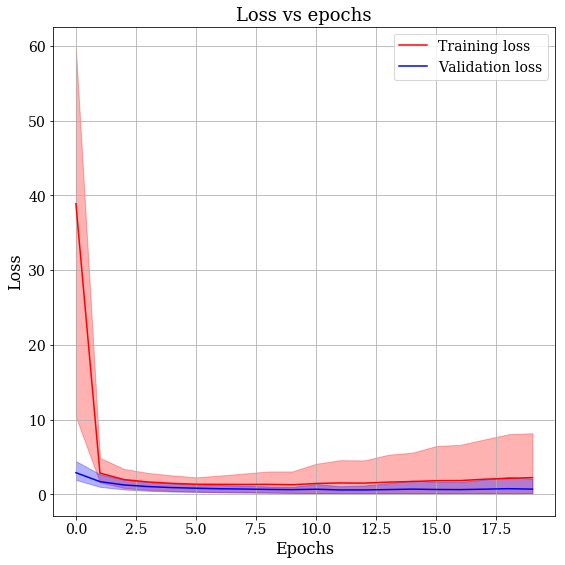

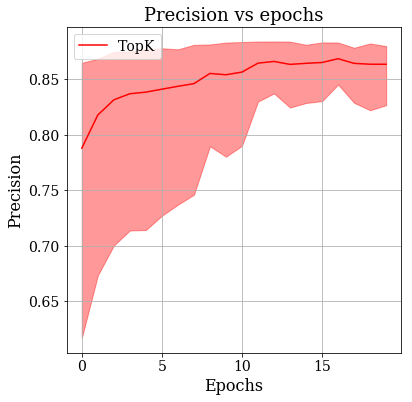

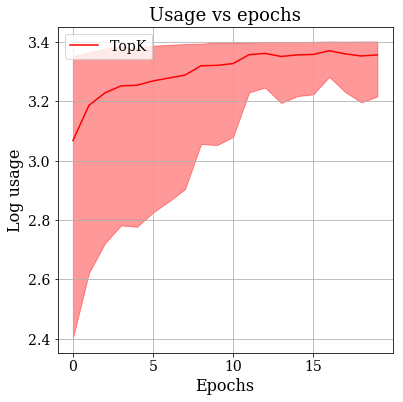

In [27]:
import numpy as np
import json
import warnings
import operator

import h5py
from keras.models import model_from_json
from keras import backend as K
from keras.utils import get_custom_objects

from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

base_path = 'data/rnn_custom_loss_topk/'


font = {'family': 'serif', 'size': 14}

plt.rc('font', **font)

size_title = 18
size_label = 16
n_pred = 2

def read_file(path):
    with open(path) as f:
        data = f.read()
        data = data.split("\n")
        data.remove('')
        data = list(map(float, data))
        return data
    
def plot_loss(x_val1, loss_tr_y1, loss_tr_y2, x_val2, loss_te_y1, loss_te_y2, title, xlabel, ylabel, leg):

    plt.figure(figsize=(9, 9))
    x_pos = np.arange(len(x_val1))
    plt.plot(x_pos, x_val1, 'r')
    plt.plot(x_pos, x_val2, 'b')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.fill_between(x_pos, loss_tr_y1, loss_tr_y2, color = 'r', alpha = 0.3)
    plt.fill_between(x_pos, loss_te_y1, loss_te_y2, color = 'b', alpha = 0.3)
    plt.legend(leg)
    plt.grid(True)
    plt.show()


def plot_accuracy(x_val1, y1_acc, y2_acc, title, xlabel, ylabel, leg):

    plt.figure(figsize=(6, 6))
    x_pos = np.arange(len(x_val1))
    plt.plot(x_pos, x_val1, 'r')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.fill_between(x_pos, y1_acc, y2_acc, color = 'r', alpha = 0.4)
    plt.legend(leg)
    plt.grid(True)
    plt.show()
    
def extract_precision(precision_path):

    top1_compatible_precision = list()
    top2_compatible_precision = list()
    top3_compatible_precision = list()
    with open(precision_path) as f:
        data = f.read()
        data = data.split("\n")
        data.remove('')
        
        for row in data:
            row = row.split('\n')
            row = row[0].split(' ')
            row = list(map(float, row))
            top1_compatible_precision.append(row[0])
    return top1_compatible_precision

def compute_fill_between(a_list):
    y1 = list()
    y2 = list()

    a_list = np.array(a_list, dtype=float)
    n_cols = a_list.shape[1]

    for i in range(0, n_cols):
        pos = a_list[:, i]
        y1.append(min(pos))
        y2.append(max(pos))

    return y1, y2

def plot_usage(x_val1, y1, y2, title, xlabel, ylabel, leg):

    plt.figure(figsize=(6, 6))
    x_pos = np.arange(len(x_val1))
    plt.plot(x_pos, x_val1, 'r')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.fill_between(x_pos, y1, y2, color = 'r', alpha = 0.4)
    plt.legend(leg)
    plt.grid(True)
    plt.show()
    

method_type = base_path
runs = 5

train_loss = list()
test_loss = list()
precision_acc_topk = list()

for i in range(1, runs+1):
    path = method_type + 'run' + str(i) + '/'
    tr_loss_path = path + 'train_loss.txt'
    val_loss_path = path + 'validation_loss.txt'
    precision_path = path + 'precision.txt'
    
    try:
        #Training loss
        tr_loss = read_file(tr_loss_path)
        train_loss.append(tr_loss)
    
        #Test loss
        te_loss = read_file(val_loss_path)
        test_loss.append(te_loss)
    
        # Precision
        topk_p = extract_precision(precision_path)
        precision_acc_topk.append(topk_p)
        print(path)
    except Exception:
        continue


mean_tr_loss = np.mean(train_loss, axis=0)
mean_te_loss = np.mean(test_loss, axis=0)
mean_top1_acc = np.mean(precision_acc_topk, axis=0)

loss_tr_y1, loss_tr_y2 = compute_fill_between(train_loss)
loss_te_y1, loss_te_y2 = compute_fill_between(test_loss)

plot_loss(mean_tr_loss, loss_tr_y1, loss_tr_y2, mean_te_loss, loss_te_y1, loss_te_y2, "Loss vs epochs", "Epochs", "Loss", ['Training loss', 'Validation loss'])

y1_acc, y2_acc = compute_fill_between(precision_acc_topk)

plot_accuracy(mean_top1_acc, y1_acc, y2_acc, "Precision vs epochs", "Epochs", "Precision", ['TopK'])

usage_topk = list()


for i in range(1, runs+1):
    path = method_type + 'run' + str(i) + '/'
    usage_path = path + 'usage_weights.txt'
    
    try:
        # Usage
        top1_p = extract_precision(usage_path)
        usage_topk.append(top1_p)
    except Exception:
        continue

mean_top1_usage = np.mean(usage_topk, axis=0)

y1, y2 = compute_fill_between(usage_topk)

plot_usage(mean_top1_usage, y1, y2, "Usage vs epochs", "Epochs", "Log usage", ['TopK'])